In [325]:
from collections import OrderedDict

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import NullFormatter
from PIL import Image

# Lab 6: Image Classification

SIO 236<br />
Moon Limb

Background (Copied directly from the lab):

This section uses a composite image of Wilkins Sound in the Antarctic Peninsula made from the first seven spectral bands of data collected by MODIS (which stands for Moderate Resolution Imaging Spectrora- diometer). ...

This particular image was chosen because it depicts an episode of the disintegration of the Wilkins Ice Shelf in March 2008. A team led by researchers at the National Snow and Ice Data Center and the Scripps Institution of Oceanography wrote a journal article [1] detailing how this event was observed through remote sensing, which may be accessed at http://dx.doi.org/10.1016/j.epsl.2008.12.027.

Update

|band #|min (μm) |center (μm)| color    | applications |
|------|---------|-----------|----------|-----------------------|
|  1   |  0.620  |  0.670    |  Red     |Absolute land cover transformation, Vegetation 
|  2   |  0.841  |  0.876    |  Near-IR |Cloud amount, Vegetation land cover transformation
|  3   |  0.459  |  0.479    |  Blue    |Soil/vegetation differences
|  4   |  0.545  |  0.565    |  Green   |Green vegetation
|  5   |  1.230  |  1.250    |  Mid-IR  |Leaf/canopy differences 
|  6   |  1.628  |  1.652    |  Mid-IR  |Snow/cloud differences 
|  7   |  2.105  |  2.155    |  Mid-IR  |Cloud properties, Land properties 
#### <center>Table 2.1: MODIS Spectral Bands

## Image of Wilkins Sound MODIS (Scambos et al. 2009)

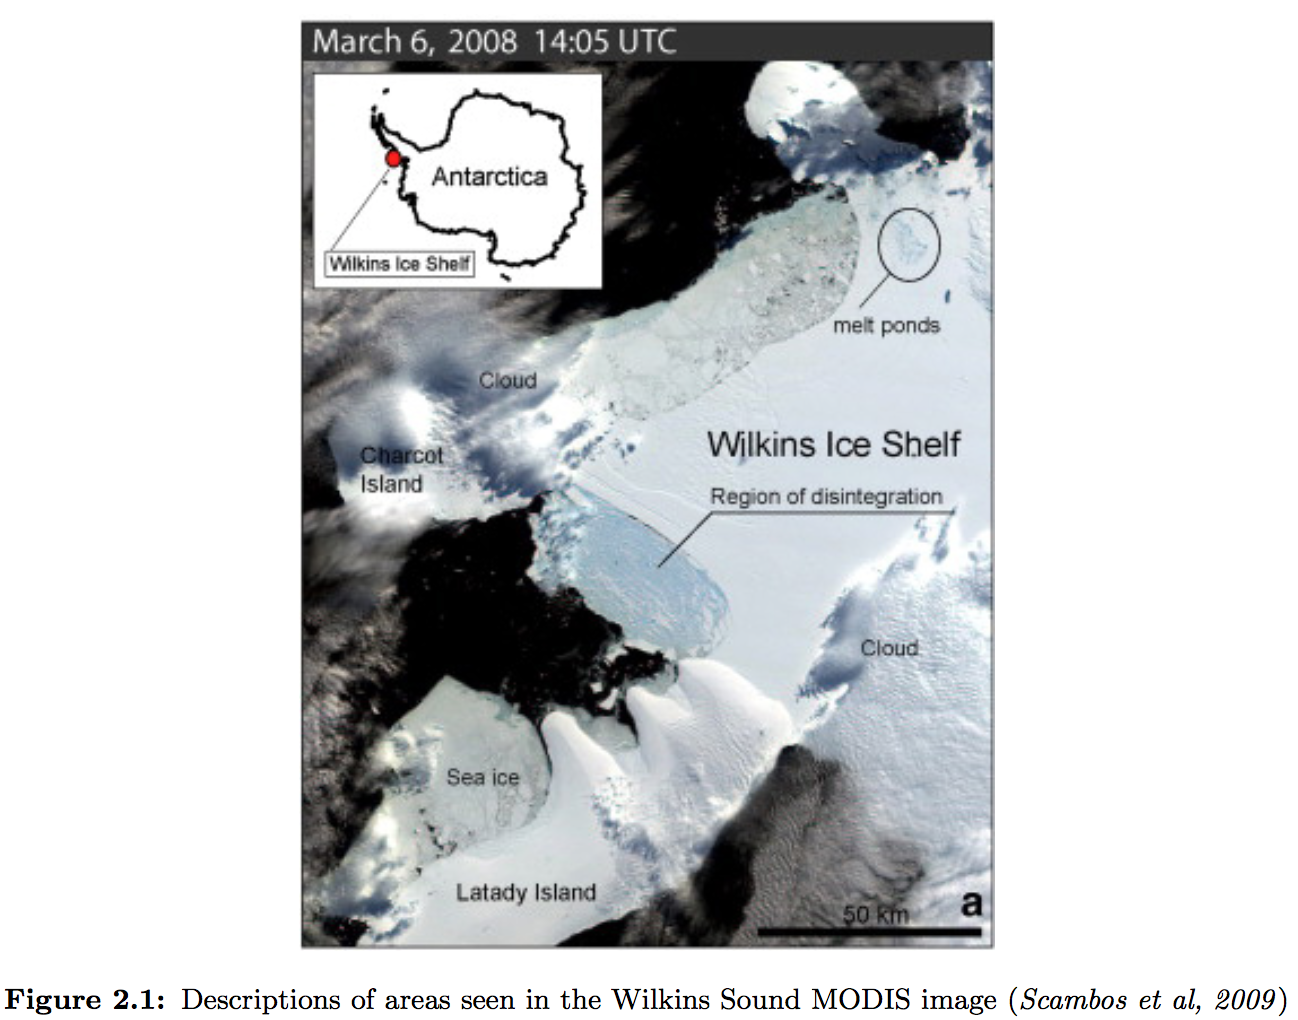

In [327]:
# namespacing for now b/c PIL library ak
def show_image():
    from IPython.display import Image
    return Image(filename='./lab6/fig_wilkins_sound.png') 

show_image()

# 2.1 Exercise 1

1. Read all 7 bands of the Wilkins Sound MODIS image **<span style="color:black; background-color: yellow">DONE</span>**.
2. Display all 7 bands individually **<span style="color:black; background-color: yellow">DONE</span>**.
3. Display an RGB image **<span style="color:black; background-color: yellow">DONE</span>**.

NOTE: RGB image will be used to identify pixels for the training set

In [ ]:
"""
Read .dat files (dtype is unsigned integer)
"""
# in some cases, it's bad to mix data + displayable content
# but this approach avoids manually supplying plot title
# and all band-relevant information is in one place

# Make ordered dict to preserve order of band #s
bands = OrderedDict()

# list of dictionaries. each band has a dictionary with 
# displayable name (title) and file name/location (source)
bands['red'] = {'title': 'Red', 'source': './lab6/modis.dat/modis1.dat'}
bands['nif'] = {'title': 'Near-Infrared', 'source': './lab6/modis.dat/modis2.dat'}
bands['blue'] = {'title': 'Blue', 'source': './lab6/modis.dat/modis3.dat'}
bands['green'] = {'title': 'Green', 'source': './lab6/modis.dat/modis4.dat'}
bands['mif1'] = {'title': 'Mid-Infrared1', 'source': './lab6/modis.dat/modis5.dat'}
bands['mif2'] = {'title': 'Cloud (Mid-Infrared2)', 'source': './lab6/modis.dat/modis6.dat'}
bands['mif3'] = {'title': 'Mid-Infrared3', 'source': './lab6/modis.dat/modis7.dat'}

# np.fromfile requires reshaping by specifying the dimensions
# np.loadtxt doesn't and loads 400 by 400 2D-array

# I am modifying the object I am looping over. 
# this is a bad approach when dealing with larger data
for _, band in bands.iteritems():
    band['data'] = np.loadtxt(band['source'], dtype='uint8')

### Make a composite RGB image

In [ ]:
red = bands['red']['data']
green = bands['green']['data']
blue = bands['blue']['data']

rgb_image = Image.fromarray(np.stack([red, green, blue], axis=2), mode='RGB')

#### Function to display a grayscale image

In [ ]:
# reusing function from Lab5
def plot_band_graysc(_plt, _subplot_num, _data, _title):
    """ Plot the given band (data) in grayscale
    
    data (numpy array)
    title (string): plot title
    """
    _plt.subplot(_subplot_num)
    _plt.imshow(_data, cmap=plt.cm.gray)

    # label axes
#    _plt.xlabel('X')
#    _plt.ylabel('Y')
    _plt.title(_title, fontsize=16) 
    

### Display all 7 bands individually AND display a composite RGB image

In [ ]:
plt.close()
plt.figure(figsize=(16, 8))

In [ ]:
# list of subplot numbers
ls_subplots = xrange(241, 248+1)

In [ ]:
# unpacks bands
# i -> index #, should range from [0, len(bands)-1], which is [0, 7]
#       will be used to access axes
# _ -> band key names (ex.'red', 'nif'); unnamed b/c that will not be used here
# band -> dictionary defined above, containg these keys: 'source', 'data', 'title'

for i, [_, band] in enumerate(bands.iteritems()):
    plot_band_graysc(plt, ls_subplots[i], band['data'], band['title'])

# Add RGB image
plot_band_graysc(plt, ls_subplots[-1], rgb_image, 'Composite (RGB)')
plt.grid()
plt.show() 

## Make a gridded image to pick out 2 pixels per group

In [ ]:
plt.close()
plt.figure(figsize=(14, 14))

# Add RGB image
plt.imshow(rgb_image, cmap=plt.cm.gray)
plt.grid()
plt.show() 

# 2.2 Exercise 2

Prep data:

1. Decide: How many groups/classes to sort image into (ex. sea ice, open ocean, clouds, etc.) **<span style="color:black; background-color: yellow">DONE</span>**.
2. Identify: at least 2 training pixels per group **<span style="color:black; background-color: yellow">DONE</span>**.
3. Create a 3-column matrix (`tpix`) containing the a) row, b) column, and c) group number of each training pixel **<span style="color:black; background-color: yellow">DONE</span>**.
4. Create a 7-col matrix (`train`) continaing each of the 7 band-values for every pixel identified in `tpix` **<span style="color:black; background-color: yellow">DONE</span>**.

Tip: Each line of `tpix` should have 3 numbers in the following format:
    (row, col, group)

#### Run classify command:

MATLAB command: 
```MATLAB
[class, err, misfit] = classify(AllPix, train, group)
```
where

    `Allpix` is matrix of 7 band values for each pixel across the image
    `train` is the trainng set
    `group`  is the group each training pixel belongs too
    `class` is a vector telling which group each pixel belongs to
    `err` is dummy varaible that can be ignored
    `misfit` is a matrix telling how well each pixel fits into each group, 0=doesn't fit 1= perfect fit
    

#### Four groups are:

1. Sea Ice

2. Ocean

3. Clouds

4. Snow

### Identify: at least 2 training pixels per group
### Make `tpix` -- 3 colum matrix in row, col, group # format

In [ ]:
# (x, y, group_num)

# Format: `row col group_num; row col group_num; ...' 
# create matrix of 3 columns and 8 rows (2 per each group)
tpix = np.array(
    np.matrix('125 300 1; 200 100 1; 300 300 2; 100 118 2;'+
        '150 250 3; 125 225 3; 250 150 4; 300 100 4'))

In [ ]:
tpix

In [ ]:
xs = tpix[:,0]
ys = tpix[:,1]

In [ ]:
plt.close()
plt.figure(figsize=(14, 14))

# Add RGB image
plt.imshow(rgb_image, cmap=plt.cm.gray)
plt.grid()

# Validation: plot training pixel points on the plot to confirm
# x and y pixel coordinates are grouped correctly
plt.scatter(xs, ys, c=tpix[:,2], s=100)
plt.show() 

### Make `train` --  A 7-col matrix continaing each of the 7 band-values for every pixel in `tpix`


In [ ]:
bands['red']['data']

In [ ]:
for pix in tpix:
    print pix

In [ ]:
# just checking the order of bands
bands.keys()

In [ ]:
# 8 rows -> per pixel
# 7 columns -> per  band

train = np.empty([8, 7], dtype="uint8")

for i, pix in enumerate(tpix):
    x = pix[0]
    y = pix[1]
    train[i, 0] = bands['red']['data'][x, y]
    train[i, 1] = bands['nif']['data'][x, y]
    train[i, 2] = bands['blue']['data'][x, y]
    train[i, 3] = bands['green']['data'][x, y]
    train[i, 4] = bands['mif1']['data'][x, y]
    train[i, 5] = bands['mif2']['data'][x, y]
    train[i, 6] = bands['mif3']['data'][x, y]

## Exercise 2.3

Reshape class and misfit back into matrices `nx x ny`
Look at the classiication with equivalent of MATLAB's `image` or `imagesc` (can use colormap)

Questions:

1. Does the classification make sense?

2. Is all the ocean in one group?

3. All the clouds in another?